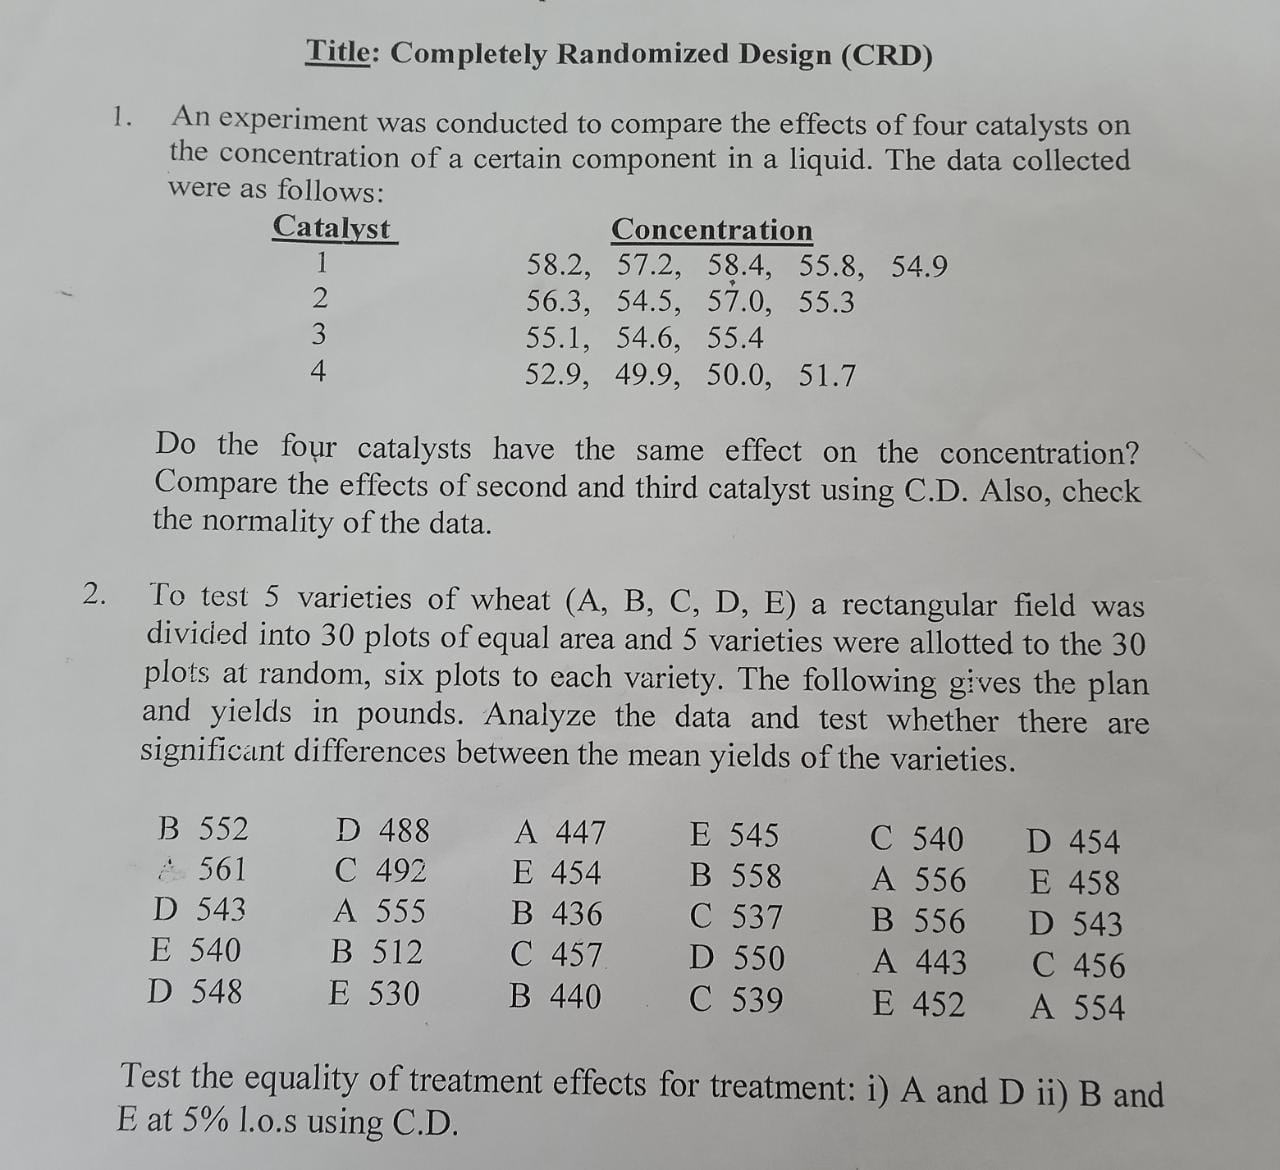

In [21]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [22]:
import numpy as np

# Q1

In [24]:
#c1=[58.2,57.2,58.4,55.8,54.9]
#c2=[56.3,54.5,57.0,55.3,np.nan]
#c3=[55.1,54.6,55.4,np.nan,np.nan]
#c4=[52.9,49.9,50.0,51.7,np.nan]

#### Mean Imputation   

In [78]:
c1=[58.2,57.2,58.4,55.8,54.9]
c2=[56.3,54.5,57.0,55.3,55.775]
c3=[55.1,54.6,55.4,55.033333,55.033333]
c4=[52.9,49.9,50.0,51.7,51.125]

##### for all catalyst

In [90]:
dict = {'C1':c1,"C2":c2,"C3":c3,"C4":c4}
df = pd.DataFrame(dict)

In [91]:
df

,C1,C2,C3,C4
0,58.2,56.300,55.100000,52.900
1,57.2,54.500,54.600000,49.900
2,58.4,57.000,55.400000,50.000
3,55.8,55.300,55.033333,51.700
4,54.9,55.775,55.033333,51.125


In [92]:
df.sum()

C1    284.500000
C2    278.875000
C3    275.166666
C4    255.625000
dtype: float64

In [93]:
df1 = df.melt()

In [94]:
df1

,variable,value
0,C1,58.200000
1,C1,57.200000
2,C1,58.400000
3,C1,55.800000
4,C1,54.900000
5,C2,56.300000
6,C2,54.500000
7,C2,57.000000
8,C2,55.300000
9,C2,55.775000


In [95]:
df1.columns

Index(['variable', 'value'], dtype='object')

In [96]:
lm = ols('value ~ variable',data=df1).fit()
table = sm.stats.anova_lm(lm)
print(table)

            df     sum_sq    mean_sq          F    PR(>F)
variable   3.0  94.435416  31.478472  25.905986  0.000002
Residual  16.0  19.441667   1.215104        NaN       NaN


In [97]:
import scipy.stats

In [98]:
scipy.stats.f.ppf(q=1-.05, dfn=3, dfd=16)

3.238871517453585

In [99]:
#Now since Ft=3.238871517453585 and Fc=25.905986
#i.e. Fc>Ft
#We Will REJECT the null hypothesis

#here 
#Ho=All 4 catalyst have same effect
#H1=All 4 catalyst do not have same effect

#Hence we reject null Hypothesis at 5% Level of significance and conclude that catalyst differ significantly

##### For 2 and 3

In [100]:
dict23 = {"C2":c2,"C3":c3}
df2 = pd.DataFrame(dict23)

In [101]:
df2.sum()

C2    278.875000
C3    275.166666
dtype: float64

In [102]:
df3 = df2.melt()

In [103]:
df3

,variable,value
0,C2,56.300000
1,C2,54.500000
2,C2,57.000000
3,C2,55.300000
4,C2,55.775000
5,C3,55.100000
6,C3,54.600000
7,C3,55.400000
8,C3,55.033333
9,C3,55.033333


In [104]:
df3.columns

Index(['variable', 'value'], dtype='object')

In [105]:
lm = ols('value ~ variable',data=df3).fit()
table = sm.stats.anova_lm(lm)
print(table)

           df    sum_sq   mean_sq         F    PR(>F)
variable  1.0  1.375174  1.375174  2.782228  0.133871
Residual  8.0  3.954167  0.494271       NaN       NaN


In [108]:
scipy.stats.f.ppf(q=1-.05, dfn=1, dfd=8)

5.317655071578714

In [109]:
#Now since Ft=5.317655071578714 and Fc=2.782228
#i.e. Fc<Ft
#We Will ACCEPT the null hypothesis

#here 
#Ho= 2 and 3 catalyst have same effect
#H1= 2 and 3 catalyst do not have same effect

#Hence we Accept null Hypothesis at 5% Level of significance and conclude that catalyst 2 and 3 are similar

# Q2

In [45]:
A=[447,561,556,555,443,554]
B=[552,558,436,556,512,440]
C=[540,492,537,457,456,539]
D=[488,454,543,543,550,548]
E=[545,454,458,540,530,452]

In [49]:
dictQ2 = {"A":A,"B":B,"C":C,"D":D,"E":E}
dfQ2 = pd.DataFrame(dictQ2)

In [52]:
df1Q2 = dfQ2.melt()

In [53]:
df1Q2.columns

Index(['variable', 'value'], dtype='object')

##### For all treatments

In [54]:
lm = ols('value ~ variable',data=df1Q2).fit()
table = sm.stats.anova_lm(lm)
print(table)

            df        sum_sq      mean_sq         F   PR(>F)
variable   4.0   2601.133333   650.283333  0.270104  0.89442
Residual  25.0  60188.333333  2407.533333       NaN      NaN


In [55]:
scipy.stats.f.ppf(q=1-.05, dfn=4, dfd=25)

2.758710469717632

In [56]:
#For all treatments
#Now since Ft=2.758710469717632 and Fc=0.270104
#i.e. Fc<Ft
#We Will ACCEPT the null hypothesis

#here 
#Ho= ALL treatments have same effect
#H1= ALL treatments do not have same effect

#Hence we Accept null Hypothesis at 5% Level of significance and conclude that ALL treatments are similar

##### A and D

In [61]:
dict2Q2 = {"A":A,"D":D}
df2Q2 = pd.DataFrame(dict2Q2)

In [62]:
df2Q2

,A,D
0,447,488
1,561,454
2,556,543
3,555,543
4,443,550
5,554,548


In [63]:
dfADQ2 = df2Q2.melt()

In [65]:
dfADQ2

,variable,value
0,A,447
1,A,561
2,A,556
3,A,555
4,A,443
5,A,554
6,D,488
7,D,454
8,D,543
9,D,543


In [64]:
dfADQ2.columns

Index(['variable', 'value'], dtype='object')

In [66]:
lm = ols('value ~ variable',data=dfADQ2).fit()
table = sm.stats.anova_lm(lm)
print(table)

            df        sum_sq      mean_sq        F    PR(>F)
variable   1.0      8.333333     8.333333  0.00337  0.954852
Residual  10.0  24729.333333  2472.933333      NaN       NaN


In [67]:
scipy.stats.f.ppf(q=1-.05, dfn=1, dfd=10)

4.9646027437307145

In [ ]:
#For A and D
#Now since Ft=4.9646027437307145 and Fc=0.00337
#i.e. Fc<Ft
#We Will ACCEPT the null hypothesis

#here 
#Ho= A and D have same effect
#H1= A and D do not have same effect

#Hence we Accept null Hypothesis at 5% Level of significance and conclude that A and D treatments are similar

##### For B and E

In [68]:
dict3Q2 = {"B":B,"E":E}
df3Q2 = pd.DataFrame(dict3Q2)

In [69]:
df3Q2

,B,E
0,552,545
1,558,454
2,436,458
3,556,540
4,512,530
5,440,452


In [70]:
dfBEQ2 = df3Q2.melt()

In [71]:
dfBEQ2

,variable,value
0,B,552
1,B,558
2,B,436
3,B,556
4,B,512
5,B,440
6,E,545
7,E,454
8,E,458
9,E,540


In [72]:
dfBEQ2.columns

Index(['variable', 'value'], dtype='object')

In [73]:
lm = ols('value ~ variable',data=dfBEQ2).fit()
table = sm.stats.anova_lm(lm)
print(table)

            df    sum_sq  mean_sq         F    PR(>F)
variable   1.0    468.75   468.75  0.172376  0.686776
Residual  10.0  27193.50  2719.35       NaN       NaN


In [74]:
scipy.stats.f.ppf(q=1-.05, dfn=1, dfd=10)

4.9646027437307145

In [75]:
#For A and D
#Now since Ft=4.9646027437307145 and Fc=0.172376 
#i.e. Fc<Ft
#We Will ACCEPT the null hypothesis

#here 
#Ho= B and E have same effect
#H1= B and E do not have same effect

#Hence we Accept null Hypothesis at 5% Level of significance and conclude that B and E treatments are similar